In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [63]:
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('DataProper.csv')
data.head()

,Unnamed: 0,loc,myear,body,transmission,fuel,km,ip,imgCount,threesixty,...,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,0,gomti nagar,2016,hatchback,manual,cng,69162.0,0,15,False,...,Multi-Point Fuel Injection,10.714206,13.000000,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,1,borivali west,2015,hatchback,manual,cng,45864.0,0,15,False,...,Gasoline Port Injection,11.000000,14.647059,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,2,jasola,2015,sedan,manual,cng,81506.0,0,15,False,...,Multi-Point Fuel Injection,9.899485,14.115385,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,3,jasola,2013,hatchback,manual,cng,115893.0,0,0,False,...,Multi-Point Fuel Injection,9.000000,13.000000,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,4,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,6,False,...,Multi-Point Fuel Injection,12.000000,15.000000,NaN,86.63,5500.0,121.5,4200.0,NaN,NaN


In [3]:
data.columns

Index(['Unnamed: 0', 'loc', 'myear', 'body', 'transmission', 'fuel', 'km',
       'ip', 'imgCount', 'threesixty', 'dvn', 'oem', 'model', 'variant',
       'City', 'listed_price', 'discountValue', 'utype', 'carType',
       'top_features', 'comfort_features', 'interior_features',
       'exterior_features', 'safety_features', 'Engine Type', 'No of Cylinder',
       'Valves per Cylinder', 'Valve Configuration', 'Turbo Charger',
       'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Gear Box',
       'Drive Type', 'Seats', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'Doors', 'Cargo Volume', 'state', 'exterior_color',
       'owner_type', 'Fuel Supply System', 'Compression Ratio',
       'Alloy Wheel Size', 'Ground Clearance Unladen', 'Max Power Delivered',
       'Max Power At', 'Max Torque Delivered', 'Max Torque At', 'Bore'

In [4]:
# Drop unnecessary columns
df = data.drop(columns = ['Unnamed: 0', 'loc', 'imgCount', 'threesixty',
                          'dvn', 'discountValue', 'Ground Clearance Unladen', 'Gross Weight', 'Bore','Stroke'])
df.shape

(37794, 53)

In [5]:
df.columns

Index(['myear', 'body', 'transmission', 'fuel', 'km', 'ip', 'oem', 'model',
       'variant', 'City', 'listed_price', 'utype', 'carType', 'top_features',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features', 'Engine Type', 'No of Cylinder',
       'Valves per Cylinder', 'Valve Configuration', 'Turbo Charger',
       'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seats', 'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type', 'Doors',
       'Cargo Volume', 'state', 'exterior_color', 'owner_type',
       'Fuel Supply System', 'Compression Ratio', 'Alloy Wheel Size',
       'Max Power Delivered', 'Max Power At', 'Max Torque Delivered',
       'Max Torque At'],
      dtype='object')

In [6]:
# Numerical and Categorical Columns
num_list = ['km','listed_price',
       'Length','Width','Height','Wheel Base','Front Tread','Rear Tread','Kerb Weight',
       'Turning Radius','Top Speed','Acceleration','Cargo Volume','Compression Ratio',
       'Max Power Delivered','Max Power At',
       'Max Torque Delivered','Max Torque At']

In [7]:
cat_list = ['myear','Doors','body','transmission','fuel','oem','model','variant','City','utype',
       'carType','top_features','comfort_features','interior_features','exterior_features',
       'safety_features','Engine Type','Valve Configuration','Gear Box','Drive Type',
       'Steering Type','Front Brake Type','Rear Brake Type','Tyre Type','state','exterior_color',
       'owner_type','Fuel Supply System','Turbo Charger','Super Charger','ip',
       'No of Cylinder','Valves per Cylinder', 'Seats', 'Alloy Wheel Size']

In [8]:
cat = df[cat_list]
num = df[num_list]

In [9]:
num.shape

(37794, 18)

In [10]:
cat.shape

(37794, 35)

### Five Point Summary

In [11]:
num.describe()

,km,listed_price,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Turning Radius,Top Speed,Acceleration,Cargo Volume,Compression Ratio,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At
count,3.779400e+04,3.779400e+04,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000
mean,6.241425e+04,7.855572e+05,4111.922025,1724.577737,1577.458829,2545.139519,1479.029049,1479.121198,1190.647497,5.117158,170.231650,13.225428,361.576453,12.543261,102.594676,5113.984230,183.685479,3191.604673
std,5.848207e+04,1.132965e+06,400.507984,128.833868,114.937779,156.604752,79.472420,83.282520,318.809090,0.595758,23.577491,2.958310,143.712973,3.674927,42.840273,1056.468906,103.174808,1023.949182
min,1.010000e+02,1.196300e+04,2752.000000,1312.000000,1165.000000,1840.000000,1143.000000,1190.000000,451.000000,3.500000,70.000000,2.500000,20.000000,0.000000,10.800000,1620.000000,16.100000,500.000000
25%,3.174125e+04,3.200000e+05,3785.000000,1677.000000,1495.000000,2425.000000,1457.000000,1450.061728,945.139031,4.800000,156.000000,11.640000,252.577497,10.300000,74.020000,4000.000000,113.000000,2125.000000
50%,5.673500e+04,5.250000e+05,3995.000000,1710.000000,1530.000000,2520.000000,1493.642857,1498.000000,1100.000000,5.135000,165.020708,13.100000,346.000000,10.714206,88.500000,5500.000000,146.000000,3500.000000
75%,8.331225e+04,8.553972e+05,4440.000000,1790.000000,1642.000000,2637.000000,1535.107348,1530.000000,1518.698956,5.300000,182.000000,14.797753,465.000000,15.869683,118.350000,6000.000000,235.000000,4000.000000
max,6.300000e+06,9.551953e+07,5982.000000,2236.000000,2075.000000,3772.000000,1705.000000,1834.000000,2962.000000,13.510000,340.000000,30.300000,2055.000000,81.000000,769.310000,8250.000000,900.000000,6750.000000


In [12]:
cat.describe()

,myear,Doors,ip,No of Cylinder,Valves per Cylinder,Seats,Alloy Wheel Size
count,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000,37794.000000
mean,2015.569641,4.664047,0.010213,3.807430,3.884823,5.236572,15.137628
std,3.778998,0.496686,0.100545,0.577964,0.465962,0.722090,1.507089
min,1983.000000,2.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,2013.000000,4.000000,0.000000,4.000000,4.000000,5.000000,14.000000
50%,2016.000000,5.000000,0.000000,4.000000,4.000000,5.000000,15.000000
75%,2018.000000,5.000000,0.000000,4.000000,4.000000,5.000000,16.000000
max,2023.000000,6.000000,1.000000,12.000000,8.000000,14.000000,21.000000


## Correlation Matrix

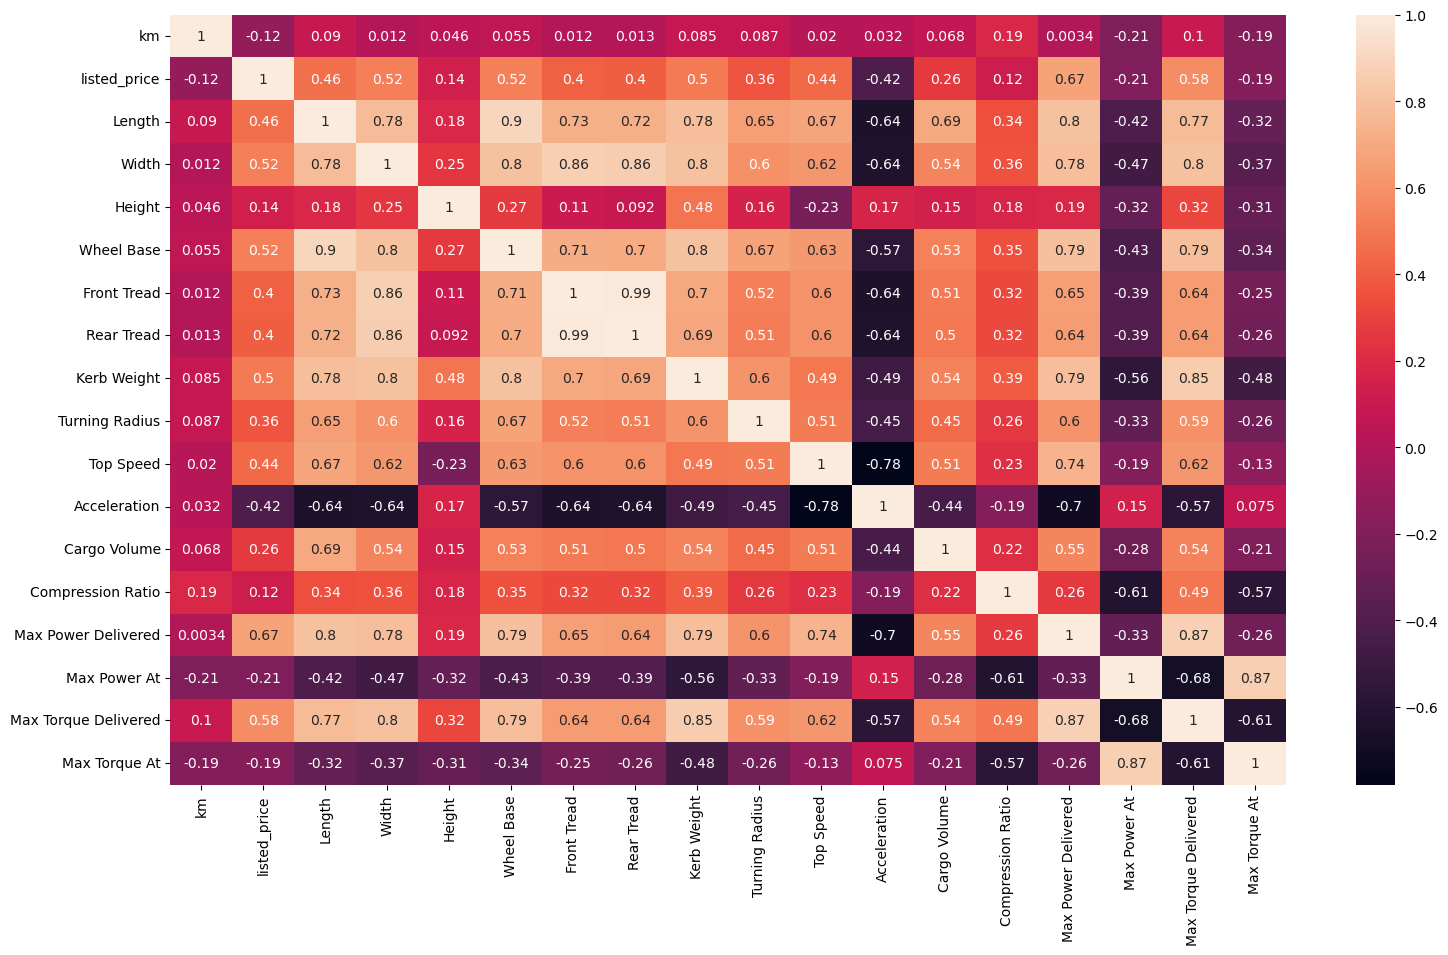

In [13]:
plt.figure(figsize=[18,10])
sns.heatmap(num.corr(),annot=True)
plt.show()

# Feature Engineering

## Various Features of the Cars

### Interior Features

In [14]:
df['interior_features'].unique()

int_feat = []
for i in df['interior_features']:
    int_feat.append((len(i.split(sep=','))))
df['interior_features'] = int_feat

df['interior_features'].unique()

array([ 7, 11,  5,  9,  4,  8, 10,  1,  3,  6,  2, 12, 13, 15, 16, 14, 17,
       19, 18], dtype=int64)

### Exterior Features

In [15]:
df['exterior_features']

ext_feat = []
for i in df['exterior_features']:
    ext_feat.append((len(i.split(sep=','))))
df['exterior_features'] = ext_feat

df['exterior_features'].unique()

array([ 6,  5,  4, 11,  8,  9,  3, 14, 10,  2,  1,  7, 12, 16, 13, 18, 20,
       15, 19, 17, 21, 25, 22, 23, 27, 26, 24], dtype=int64)

### Comfort Features

In [16]:
df['comfort_features']

com_feat = []
for i in df['comfort_features']:
    com_feat.append((len(i.split(sep=','))))
df['comfort_features'] = com_feat

df['comfort_features'].unique()

array([ 8, 10, 15,  5, 14,  6, 13,  7, 16, 12, 11,  2,  1,  3, 17,  4,  9,
       19, 20, 21, 25, 18, 24, 23, 28, 22, 26, 29, 39, 30, 33, 32, 31, 27,
       35, 34, 36, 37], dtype=int64)

### Safety Features

In [17]:
df['safety_features']

safety_feat = []
for i in df['safety_features']:
    safety_feat.append((len(i.split(sep=','))))
df['safety_features'] = safety_feat

df['safety_features'].unique()

array([14, 13, 16, 11, 27,  7, 23, 20, 18, 24, 22, 17, 19,  8,  1,  9, 15,
        6, 21, 12, 10, 29,  3, 26, 25,  5, 34, 36, 28, 33, 31, 32, 37, 30,
       49, 40, 38,  4, 44, 39, 41, 35, 42, 47, 43, 45, 48,  2, 46],
      dtype=int64)

### Top Features

In [18]:
df['top_features']

top_feat = []
for i in df['top_features']:
    top_feat.append((len(i.split(sep=','))))
df['top_features'] = safety_feat

df['top_features'].unique()

array([14, 13, 16, 11, 27,  7, 23, 20, 18, 24, 22, 17, 19,  8,  1,  9, 15,
        6, 21, 12, 10, 29,  3, 26, 25,  5, 34, 36, 28, 33, 31, 32, 37, 30,
       49, 40, 38,  4, 44, 39, 41, 35, 42, 47, 43, 45, 48,  2, 46],
      dtype=int64)

In [19]:
df.head()

,myear,body,transmission,fuel,km,ip,oem,model,variant,City,...,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,lxi cng,lucknow,...,uttar pradesh,silver,first,Multi-Point Fuel Injection,10.714206,13.000000,58.16,6200.0,77.0,3500.0
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,green vxi,mumbai,...,maharashtra,grey,first,Gasoline Port Injection,11.000000,14.647059,58.20,6000.0,78.0,3500.0
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,s plus i-vtec,new delhi,...,delhi,silver,second,Multi-Point Fuel Injection,9.899485,14.115385,86.70,6000.0,109.0,4500.0
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,lxi cng,new delhi,...,delhi,silver,second,Multi-Point Fuel Injection,9.000000,13.000000,58.20,6200.0,77.0,3500.0
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,vxi cng,mumbai,...,maharashtra,white,first,Multi-Point Fuel Injection,12.000000,15.000000,86.63,5500.0,121.5,4200.0


### Car Age

In [20]:
df['myear'] = df['myear'].astype('int')

current_year = pd.Timestamp.today().year

df['Car Age'] = current_year - df['myear']

df['Car Age'].unique()


array([ 8,  9, 11,  2, 12, 14,  7,  3, 13,  6,  5, 10,  4, 18, 22, 21, 15,
       23,  1, 16, 19, 17, 24, 27, 31, 20, 34, 35, 25, 30, 26, 38, 41, 28])

### Color Grouping

In [21]:
def map_to_primary(color):
    color = color.lower()  
    if 'red' in color or 'cherry' in color:
        return 'red'
    elif 'blue' in color or 'aqua' in color or 'earth' in color:
        return 'blue'
    elif 'green' in color or 'military' in color or 'army' in color:
        return 'green'
    elif 'yellow' in color or 'lime' in color:
        return 'yellow'
    elif 'orange' in color or 'sand' in color:
        return 'orange'
    elif 'brown' in color or 'chocolate' in color or 'maroon' in color or 'khaki' in color or 'rust' in color:
        return 'brown'
    elif 'grey' in color or 'gray' in color or 'silver' in color:
        return 'grey'
    elif 'white' in color or 'moonlight' in color:
        return 'white'
    elif 'black' in color or 'blackk' in color:
        return 'black'
    elif 'gold' in color or 'golden' in color:
        return 'gold'
    elif 'bronze' in color or 'bronz' in color or 'brounze' in color or 'bronzo' in color or 'copper' in color:
        return 'bronze'
    elif 'purple' in color or 'plum' in color:
        return 'purple'
    elif 'pink' in color:
        return 'pink'
    elif 'beige' in color:
        return 'beige'
    else:
        return 'other' 


df['primary_color'] = df['exterior_color'].apply(map_to_primary)

In [22]:
df.head(1)

,myear,body,transmission,fuel,km,ip,oem,model,variant,City,...,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Car Age,primary_color
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,lxi cng,lucknow,...,first,Multi-Point Fuel Injection,10.714206,13.0,58.16,6200.0,77.0,3500.0,8,grey


### Volume from height, width, length

In [23]:
df['Total Volume'] = df['Height']*df['Length']*df['Width']

In [24]:
df['Total Volume'].corr(df['Cargo Volume'])

0.6053032615222855

### Power to Torque Ratio

In [25]:
df['power_torque_ratio'] = df['Max Power Delivered']/df['Max Torque Delivered']

In [26]:
df['power_torque_ratio'].head()

0    0.755325
1    0.746154
2    0.795413
3    0.755844
4    0.713004
Name: power_torque_ratio, dtype: float64

In [27]:
df['power_torque_ratio'].describe()

count    37794.000000
mean         0.615043
std          0.154764
min          0.073511
25%          0.444262
50%          0.686600
75%          0.743895
max          4.607843
Name: power_torque_ratio, dtype: float64

In [28]:
df['power_torque_ratio'].max()

4.607843137254902

In [29]:
df[df['power_torque_ratio'] == df['power_torque_ratio'].max()]

,myear,body,transmission,fuel,km,ip,oem,model,variant,City,...,Compression Ratio,Alloy Wheel Size,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Car Age,primary_color,Total Volume,power_torque_ratio
9289,2008,sedan,automatic,diesel,110000.0,0,bmw,bmw 5 series,530d highline,bhubaneswar,...,16.0,17.0,235.0,4000.0,51.0,3000.0,16,black,1.311876e+10,4.607843
9404,2008,sedan,automatic,diesel,142637.0,0,bmw,bmw 5 series,530d highline,chennai,...,16.0,17.0,235.0,4000.0,51.0,3000.0,16,grey,1.311876e+10,4.607843
9472,2009,sedan,automatic,diesel,125617.0,0,bmw,bmw 5 series,530d highline,hyderabad,...,16.0,17.0,235.0,4000.0,51.0,3000.0,15,grey,1.311876e+10,4.607843


### Power to Weight Ratio

In [30]:
df['power_weight_ratio'] = df['Max Power Delivered']/df['Kerb Weight']
df['power_weight_ratio'].head()

0    0.060583
1    0.063607
2    0.091263
3    0.060625
4    0.069304
Name: power_weight_ratio, dtype: float64

In [31]:
df['power_weight_ratio'].describe()

count    37794.000000
mean         0.084953
std          0.018999
min          0.023947
25%          0.073585
50%          0.084009
75%          0.094357
max          0.490006
Name: power_weight_ratio, dtype: float64

### Kilometers Per Year

In [32]:
df['kms_per_year'] = df['km']/df['Car Age']
df['kms_per_year'].head()

0     8645.250000
1     5096.000000
2     9056.222222
3    10535.727273
4     9450.000000
Name: kms_per_year, dtype: float64

In [33]:
df['power_weight_ratio'].describe()

count    37794.000000
mean         0.084953
std          0.018999
min          0.023947
25%          0.073585
50%          0.084009
75%          0.094357
max          0.490006
Name: power_weight_ratio, dtype: float64

### Acceleration-to-Power Ratio

In [34]:
df['Acceleration_power_ratio'] = df['Acceleration']/df['Max Power Delivered']
df['Acceleration_power_ratio'].head()

0    0.273384
1    0.258591
2    0.173010
3    0.308776
4    0.152396
Name: Acceleration_power_ratio, dtype: float64

In [35]:
df['Acceleration_power_ratio'].describe()

count    37794.000000
mean         0.155469
std          0.083144
min          0.003250
25%          0.091901
50%          0.150282
75%          0.188312
max          1.370162
Name: Acceleration_power_ratio, dtype: float64

### Speed Weight Ratio

In [36]:
df['speed_weight_ratio'] = df['Top Speed'] / df['Kerb Weight']
df['speed_weight_ratio'].head()

0    0.142708
1    0.163934
2    0.168421
3    0.142708
4    0.131200
Name: speed_weight_ratio, dtype: float64

In [37]:
df['speed_weight_ratio'].describe()

count    37794.000000
mean         0.149701
std          0.029879
min          0.043342
25%          0.127711
50%          0.154184
75%          0.171751
max          0.275000
Name: speed_weight_ratio, dtype: float64

### Turning Efficiency

In [38]:
df['Turning_efficiency'] = df['Turning Radius'] / df['Length']
df['Turning_efficiency'].head()

0    0.001278
1    0.001306
2    0.001128
3    0.001280
4    0.001183
Name: Turning_efficiency, dtype: float64

In [39]:
df['Turning_efficiency'].describe()

count    37794.000000
mean         0.001247
std          0.000102
min          0.000936
25%          0.001199
50%          0.001241
75%          0.001286
max          0.002933
Name: Turning_efficiency, dtype: float64

In [40]:
df.shape

(37794, 62)

In [41]:
### Removing Unnecessary Columns
#Length, Width, Height, Turning Radius, Max Power Delivered, Max Torque Delivered, Acceleration, Top Speed

## Encoding

In [66]:
df_en = df.copy()

In [67]:
df_en.columns

Index(['myear', 'body', 'transmission', 'fuel', 'km', 'ip', 'oem', 'model',
       'variant', 'City', 'listed_price', 'utype', 'carType', 'top_features',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features', 'Engine Type', 'No of Cylinder',
       'Valves per Cylinder', 'Valve Configuration', 'Turbo Charger',
       'Super Charger', 'Length', 'Width', 'Height', 'Wheel Base',
       'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box', 'Drive Type',
       'Seats', 'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type', 'Doors',
       'Cargo Volume', 'state', 'exterior_color', 'owner_type',
       'Fuel Supply System', 'Compression Ratio', 'Alloy Wheel Size',
       'Max Power Delivered', 'Max Power At', 'Max Torque Delivered',
       'Max Torque At', 'Car Age', 'primary_color', 'Total Volume',
       'power_torque_ratio', 'power_weight_ratio', 'kms_per_year',
       'Accelerat

In [68]:
df_en['Super Charger'].unique()

array([False,  True])

In [69]:
df_en['Super Charger'].replace({True:1, False:0}, inplace=True)

In [70]:
df_en['Super Charger'].unique()

array([0, 1], dtype=int64)

In [71]:
df_en['Turbo Charger'].unique()

array([False,  True])

In [72]:
df_en['Turbo Charger'].replace({True:1, False:0}, inplace=True)

In [73]:
df_en['Turbo Charger'].unique()

array([0, 1], dtype=int64)

In [ ]:
### Removing Unnecessary Columns
#Length, Width, Height, Turning Radius, Max Power Delivered, Max Torque Delivered, Acceleration, Top Speed

In [74]:
df_en.drop(columns=['Length', 'Width', 'Height', 
                    'Turning Radius', 'Max Power Delivered', 
                    'Max Torque Delivered', 'Acceleration', 'Top Speed'], inplace = True)

In [75]:
df_en.columns

Index(['myear', 'body', 'transmission', 'fuel', 'km', 'ip', 'oem', 'model',
       'variant', 'City', 'listed_price', 'utype', 'carType', 'top_features',
       'comfort_features', 'interior_features', 'exterior_features',
       'safety_features', 'Engine Type', 'No of Cylinder',
       'Valves per Cylinder', 'Valve Configuration', 'Turbo Charger',
       'Super Charger', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gear Box', 'Drive Type', 'Seats', 'Steering Type',
       'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Doors',
       'Cargo Volume', 'state', 'exterior_color', 'owner_type',
       'Fuel Supply System', 'Compression Ratio', 'Alloy Wheel Size',
       'Max Power At', 'Max Torque At', 'Car Age', 'primary_color',
       'Total Volume', 'power_torque_ratio', 'power_weight_ratio',
       'kms_per_year', 'Acceleration_power_ratio', 'speed_weight_ratio',
       'Turning_efficiency'],
      dtype='object')

In [76]:
cat_list

['myear',
 'Doors',
 'body',
 'transmission',
 'fuel',
 'oem',
 'model',
 'variant',
 'City',
 'utype',
 'carType',
 'top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features',
 'Engine Type',
 'Valve Configuration',
 'Gear Box',
 'Drive Type',
 'Steering Type',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'state',
 'exterior_color',
 'owner_type',
 'Fuel Supply System',
 'Turbo Charger',
 'Super Charger',
 'ip',
 'No of Cylinder',
 'Valves per Cylinder',
 'Seats',
 'Alloy Wheel Size']

In [77]:
c = ['myear',
 'Doors',
 'body',
 'transmission',
 'fuel',
 'oem',
 'model',
 'variant',
 'City',
 'utype',
 'carType',
 'top_features',
 'comfort_features',
 'interior_features',
 'exterior_features',
 'safety_features',
 'Engine Type',
 'Valve Configuration',
 'Gear Box',
 'Drive Type',
 'Steering Type',
 'Front Brake Type',
 'Rear Brake Type',
 'Tyre Type',
 'state',
 'exterior_color',
 'owner_type',
 'Fuel Supply System',
 'ip',
 'No of Cylinder',
 'Valves per Cylinder',
 'Seats',
 'Alloy Wheel Size', 'primary_color']

In [78]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

for i in c:
    df_en[i] = l.fit_transform(df_en[[i]])

In [79]:
df_en.head()

,myear,body,transmission,fuel,km,ip,oem,model,variant,City,listed_price,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gear Box,Drive Type,Seats,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,Doors,Cargo Volume,state,exterior_color,owner_type,Fuel Supply System,Compression Ratio,Alloy Wheel Size,Max Power At,Max Torque At,Car Age,primary_color,Total Volume,power_torque_ratio,power_weight_ratio,kms_per_year,Acceleration_power_ratio,speed_weight_ratio,Turning_efficiency
0,26,2,1,0,69162.0,0,29,223,2179,339,370000.0,0,1,13,7,6,5,13,345,3,4,1,0,0,2400.0,1295.000000,1290.000000,960.0,3,4,3,1,5,4,2,3,180.000000,30,621,1,10,10.714206,3,6200.0,3500.0,8,7,9.146858e+09,0.755325,0.060583,8645.250000,0.273384,0.142708,0.001278
1,25,2,1,0,45864.0,0,29,197,1926,379,365000.0,0,1,12,9,6,4,12,345,3,4,1,0,0,2425.0,1420.000000,1410.000000,915.0,3,4,3,1,5,4,3,3,235.000000,18,277,1,7,11.000000,27,6000.0,3500.0,9,7,8.985600e+09,0.746154,0.063607,5096.000000,0.258591,0.163934,0.001306
2,25,8,1,0,81506.0,0,15,85,2559,409,421000.0,0,1,15,14,10,4,15,316,4,4,4,0,0,2405.0,1491.052632,1501.315789,950.0,3,4,3,1,2,4,3,2,400.000000,8,621,3,10,9.899485,14,6000.0,4500.0,9,7,1.008832e+10,0.795413,0.091263,9056.222222,0.173010,0.168421,0.001128
3,23,2,1,0,115893.0,0,29,223,2179,409,240000.0,0,1,10,4,4,3,10,340,3,4,4,0,0,2400.0,1295.000000,1290.000000,960.0,3,4,3,1,5,4,3,2,252.577497,8,621,3,10,9.000000,3,6200.0,3500.0,11,7,9.014462e+09,0.755844,0.060625,10535.727273,0.308776,0.142708,0.001280
4,32,6,1,0,18900.0,0,29,204,3075,379,1175000.0,0,2,26,13,8,10,26,359,4,4,4,1,1,2740.0,1480.000000,1490.000000,1250.0,3,0,5,1,2,4,3,3,209.000000,18,737,1,10,12.000000,32,5500.0,4200.0,2,13,1.288680e+10,0.713004,0.069304,9450.000000,0.152396,0.131200,0.001183


# Train Test Split

In [80]:
x = df_en.drop('listed_price', axis=1)
y = df_en[['listed_price']]

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=7)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(26455, 53) (26455, 1)
(11339, 53) (11339, 1)


# Scaling

In [81]:
from sklearn.preprocessing import RobustScaler

r = RobustScaler()
xtrain_sc = r.fit_transform(xtrain)
xtrain_sc = pd.DataFrame(xtrain_sc, columns=xtrain.columns)

In [82]:
xtest_sc = r.transform(xtest)
xtest_sc = pd.DataFrame(xtest_sc, columns=xtest.columns)

# Model Building

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import explained_variance_score

from sklearn.model_selection import GridSearchCV

In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Initialize lists to store model performance metrics
mod = []
mse = []
mae = []
mape = []
r2 = []
evs = []

def model_validation_regression(model, xtrain, ytrain, xtest, ytest):
    # Fit the model
    model.fit(xtrain, ytrain)
    
    # Make predictions
    predictions = model.predict(xtest)
    
    # Calculate metrics
    mse_score = mean_squared_error(ytest, predictions)
    mae_score = mean_absolute_error(ytest, predictions)
    mape_score = mean_absolute_percentage_error(ytest, predictions)
    r2_score_value = r2_score(ytest, predictions)
    evs_score = explained_variance_score(ytest, predictions)
    
    # Print metrics
    print(f'Mean Squared Error: {mse_score:.3f}')
    print(f'Mean Absolute Error: {mae_score:.3f}')
    print(f'Mean Absolute Percentage Error: {mape_score:.3f}')
    print(f'R^2 Score: {r2_score_value:.3f}')
    print(f'Explained Variance Score: {evs_score:.3f}')
    
    
    # Ask if the user wants to save the model performance
    inp = input('Do you want to save the model in the scorecard? Y/N ')
    if inp.lower() == 'y':
        global scorecard
        mod.append(str(model))
        mse.append(mse_score)
        mae.append(mae_score)
        mape.append(mape_score)
        r2.append(r2_score_value)
        evs.append(evs_score)
        
        # Create and update the scorecard DataFrame
        scorecard = pd.DataFrame({'Model': mod, 
                                 'Mean Squared Error': mse,
                                 'Mean Absolute Error': mae,
                                  'Mean Absolute Percentage Error': mape,
                                 'R^2 Score': r2,
                                 'Explained Variance Score': evs})
    else:
        return

In [94]:
model = DecisionTreeRegressor(max_depth=7)
model_validation_regression(model, xtrain_sc, ytrain, xtest_sc, ytest)

Mean Squared Error: 852247618222.129
Mean Absolute Error: 173955.392
Mean Absolute Percentage Error: 0.240
R^2 Score: 0.539
Explained Variance Score: 0.539
Do you want to save the model in the scorecard? Y/N y


In [95]:
model = RandomForestRegressor()
model_validation_regression(model, xtrain_sc, ytrain, xtest_sc, ytest)

Mean Squared Error: 648707806112.374
Mean Absolute Error: 98321.596
Mean Absolute Percentage Error: 0.135
R^2 Score: 0.649
Explained Variance Score: 0.649
Do you want to save the model in the scorecard? Y/N y


In [96]:
model = XGBRegressor()
model_validation_regression(model, xtrain_sc, ytrain, xtest_sc, ytest)

Mean Squared Error: 635440756688.477
Mean Absolute Error: 95873.554
Mean Absolute Percentage Error: 0.128
R^2 Score: 0.657
Explained Variance Score: 0.657
Do you want to save the model in the scorecard? Y/N y


In [98]:
scorecard

,Model,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R^2 Score,Explained Variance Score
0,DecisionTreeRegressor(max_depth=7),8.522476e+11,173955.391838,0.239536,0.539403,0.539430
1,RandomForestRegressor(),6.487078e+11,98321.595607,0.134927,0.649406,0.649454
2,"XGBRegressor(base_score=None, booster=None, ca...",6.354408e+11,95873.553968,0.128271,0.656576,0.656620


# Hyper Parameter Tuning 

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, explained_variance_score

In [113]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2]}

model = XGBRegressor()
grid_search_ev = GridSearchCV(estimator=model, 
                                param_grid=param_grid, scoring='explained_variance',
                                cv=5, 
                                verbose=1, 
                                n_jobs=-1)

In [ ]:
grid_search_ev.fit(xtrain_sc, ytrain)

In [116]:
best_params = grid_search_ev.best_params_
best_score = grid_search_ev.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}
Best Score:  0.9258102752437569


# Final Model

In [119]:
final_model = XGBRegressor(**grid_search_ev.best_params_)
final_model.fit(xtrain_sc, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [120]:
train_pred = final_model.predict(xtrain_sc)

In [121]:
test_pred = final_model.predict(xtest_sc)

In [123]:
mape1 = mean_absolute_percentage_error(ytrain, train_pred)
mape2 = mean_absolute_percentage_error(ytest, test_pred)

In [126]:
adj_rsq1 = explained_variance_score(ytrain, train_pred)
adj_rsq2 = explained_variance_score(ytest, test_pred)

In [127]:
sc = pd.DataFrame({'Train': [mape1, adj_rsq1], 
                   'Test': [ mape2, adj_rsq2]}, 
                  index=['MAPE', 'Adjusted RSquared'])

In [128]:
sc

,Train,Test
MAPE,0.129647,0.137880
Adjusted RSquared,0.980989,0.705121
